In [106]:
from numpy.random import randn
import numpy as np
import pandas as pd
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 

plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 10

In [9]:
planes = pd.read_csv('planes.csv', low_memory=False)
flights = pd.read_csv('data/flights.csv', low_memory=False, usecols=['TAIL_NUMBER','ARRIVAL_DELAY'])

In [221]:
merge = pd.merge(flights,planes,on='TAIL_NUMBER',how='left')
merge = merge[merge['MANUFACTURER'].notnull()]
mean_delay_by_model = pd.DataFrame(
    merge[['MODEL', 'MANUFACTURER', 'ARRIVAL_DELAY']].groupby(['MODEL']).agg(['mean', 'count']).reset_index())
mean_delay_by_model.columns = mean_delay_by_model.columns.get_level_values(0)
mean_delay_by_model.columns = ['MODEL','MEAN','COUNT']
mean_delay_by_model = mean_delay_by_model.sort_values(by='MEAN')

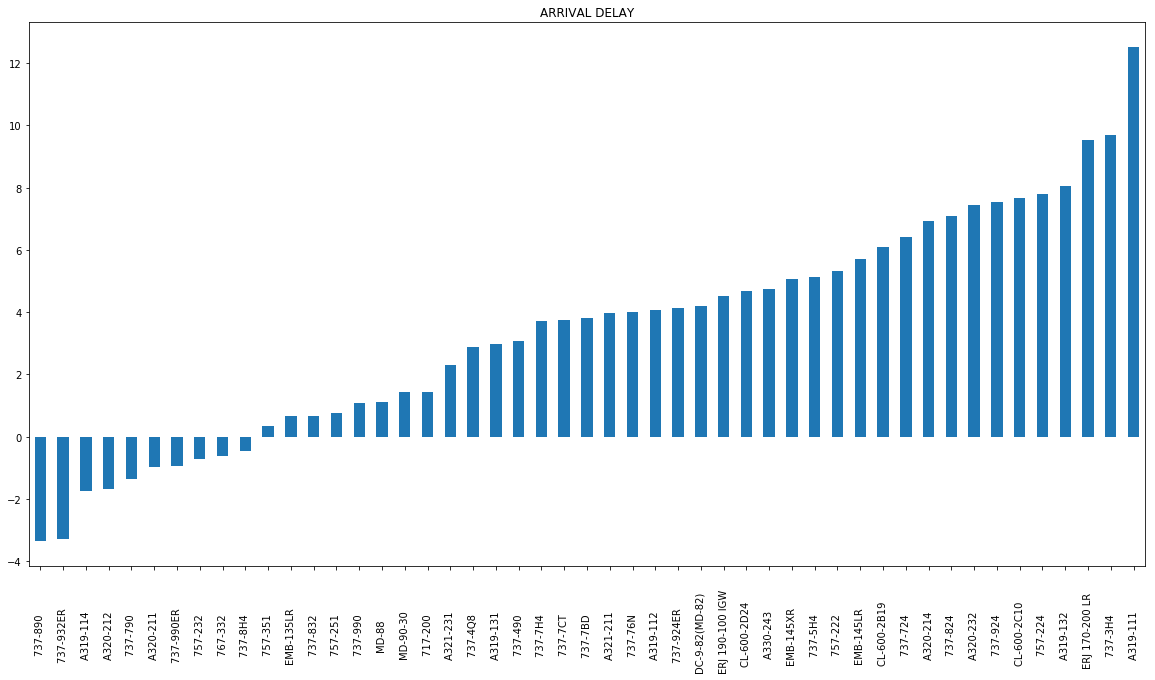

In [222]:
countries = mean_delay_by_model.query('COUNT>10000')['MODEL'].tolist()
extensions = mean_delay_by_model.query('COUNT>10000')['MEAN'].tolist()
data = {'extension' : pd.Series(extensions, index=countries)}
 
df = pd.DataFrame(data)
df[c].plot(kind='bar', figsize=(20, 10), title='ARRIVAL DELAY')